In [1]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [19]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Ambil nama file yang diupload
filename = list(uploaded.keys())[0]

# Membaca dataset
df = pd.read_csv(filename)

# Menampilkan 5 baris pertama dari dataset
print(df.head())
print(df.info())


Saving dataset_buys _comp.csv to dataset_buys _comp (2).csv
          Age  Income Student Credit_Rating  Buys_Computer
0         Tua  Tinggi      Ya         Buruk              0
1  Paruh Baya  Tinggi      Ya          Baik              1
2  Paruh Baya  Rendah   Tidak         Buruk              1
3         Tua  Rendah   Tidak          Baik              1
4         Tua  Rendah      Ya          Baik              1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None


In [20]:
# Encode kolom kategorikal ke angka (kalau ada string)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# isahkan fitur dan target
# Ubah sesuai nama kolom target di dataset kamu
target_column = 'Buys_Computer'  # Ganti kalau berbeda
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Apakah ada null di X_train?:", X_train.isnull().sum().sum())
print("Apakah ada null di y_train?:", y_train.isnull().sum())

# Train model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)

print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

X_train shape: (800, 4)
y_train shape: (800,)
Apakah ada null di X_train?: 0
Apakah ada null di y_train?: 0

Akurasi: 0.805

Confusion Matrix:
 [[ 57  14]
 [ 25 104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        71
           1       0.88      0.81      0.84       129

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200



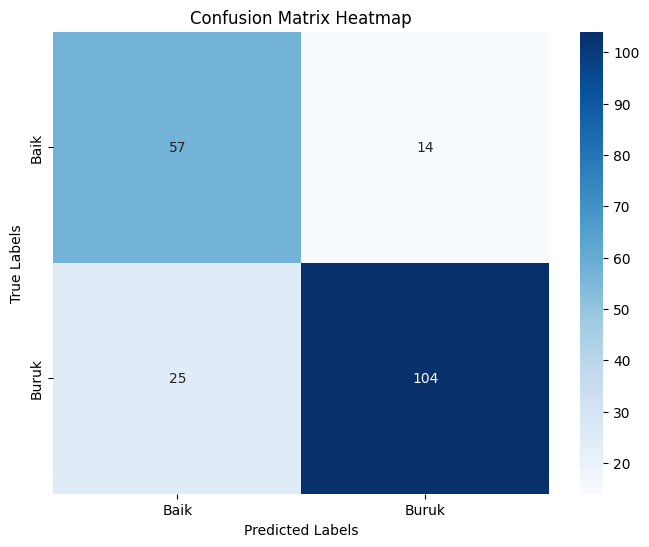

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
# xticklabels dan yticklabels pakai kelas label encoder jika target aslinya string
classes = le.classes_ if hasattr(le, "classes_") else ["0", "1"]

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

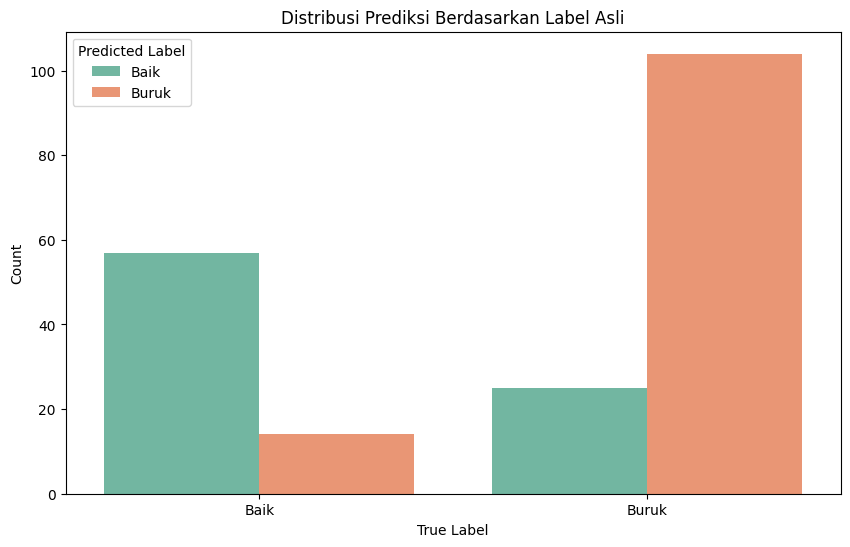

In [23]:
# Membuat DataFrame hasil prediksi
results_df = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})

# Mapping label numerik ke label asli (misalnya 'yes' dan 'no')
# Cek dulu kelas yang digunakan
label_map = {i: label for i, label in enumerate(le.classes_)}
results_df['True Label'] = results_df['True Label'].map(label_map)
results_df['Predicted Label'] = results_df['Predicted Label'].map(label_map)

# Membuat plot distribusi prediksi
plt.figure(figsize=(10, 6))
sns.countplot(data=results_df, x='True Label', hue='Predicted Label', palette='Set2')

# Tambahkan label dan judul
plt.xlabel('True Label')
plt.ylabel('Count')
plt.title('Distribusi Prediksi Berdasarkan Label Asli')
plt.legend(title='Predicted Label')
plt.show()